In [1]:
# Upload file kaggle.json
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
# Mengambil dataset kaggle 
! kaggle datasets download siddharthss/crop-recommendation-dataset

  0% 0.00/63.7k [00:00<?, ?B/s]
100% 63.7k/63.7k [00:00<00:00, 52.6MB/s]


In [7]:
! unzip crop-recommendation-dataset.zip

Archive:  crop-recommendation-dataset.zip
  inflating: Crop_recommendation.csv  


In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [9]:
df_crop=pd.read_csv('/content/Crop_recommendation.csv')
df_crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [10]:
df_crop.isna().sum()


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [11]:
df_crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [12]:
keep_row = ['rice', 'maize', 'grapes', 'apple', 'coffee']

In [13]:
df_crop = df_crop[df_crop['label'].isin(keep_row)]#.reset_index(drop=True)
df_crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [14]:
df_crop['label'].unique()

array(['rice', 'maize', 'grapes', 'apple', 'coffee'], dtype=object)

<Axes: >

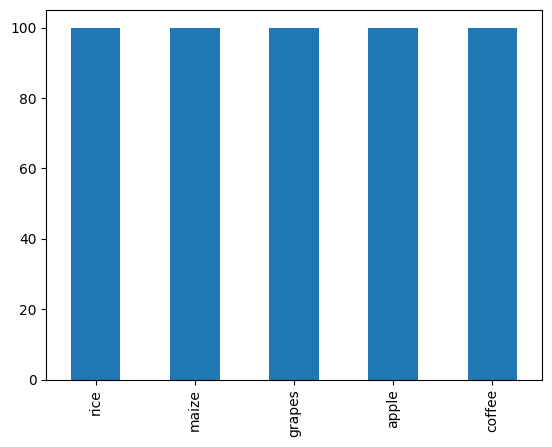

In [15]:
df_crop.label.value_counts().plot(kind = 'bar')

In [16]:
label_encode = LabelEncoder()

df_crop['label'] = label_encode.fit_transform(df_crop['label'])
crop_category = {index : label for index, label in enumerate(label_encode.classes_)}
crop_category

{0: 'apple', 1: 'coffee', 2: 'grapes', 3: 'maize', 4: 'rice'}

In [17]:
X = df_crop.drop('label', axis = 1)
y = df_crop['label']
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [18]:
y

0       4
1       4
2       4
3       4
4       4
       ..
2195    1
2196    1
2197    1
2198    1
2199    1
Name: label, Length: 500, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)


In [20]:
X_train.shape

(400, 7)

In [21]:
y_class = len(y_train.unique())

In [22]:
inputs = tf.keras.Input(shape = (7, ))
x = tf.keras.layers.Dense(256, activation = 'relu')(inputs)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(128, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(64, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(y_class, activation = 'softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
)

batch_size = 128
epochs = 89

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 dense (Dense)               (None, 256)               2048      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 5)                 325   

In [23]:
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    batch_size = batch_size,
    epochs = epochs
)

Epoch 1/89
3/3 [==============================] - 4s 456ms/step - loss: 14.0371 - accuracy: 0.2219 - val_loss: 6.6350 - val_accuracy: 0.4750
Epoch 2/89
3/3 [==============================] - 0s 42ms/step - loss: 7.3768 - accuracy: 0.3719 - val_loss: 2.9406 - val_accuracy: 0.5375
Epoch 3/89
3/3 [==============================] - 0s 39ms/step - loss: 4.6815 - accuracy: 0.4938 - val_loss: 0.9442 - val_accuracy: 0.6875
Epoch 4/89
3/3 [==============================] - 0s 43ms/step - loss: 4.0017 - accuracy: 0.5188 - val_loss: 0.5453 - val_accuracy: 0.7750
Epoch 5/89
3/3 [==============================] - 0s 53ms/step - loss: 2.7899 - accuracy: 0.5969 - val_loss: 0.2371 - val_accuracy: 0.9500
Epoch 6/89
3/3 [==============================] - 0s 43ms/step - loss: 1.8332 - accuracy: 0.6219 - val_loss: 0.5885 - val_accuracy: 0.7250
Epoch 7/89
3/3 [==============================] - 0s 52ms/step - loss: 1.9622 - accuracy: 0.6281 - val_loss: 0.4036 - val_accuracy: 0.8000
Epoch 8/89
3/3 [=========

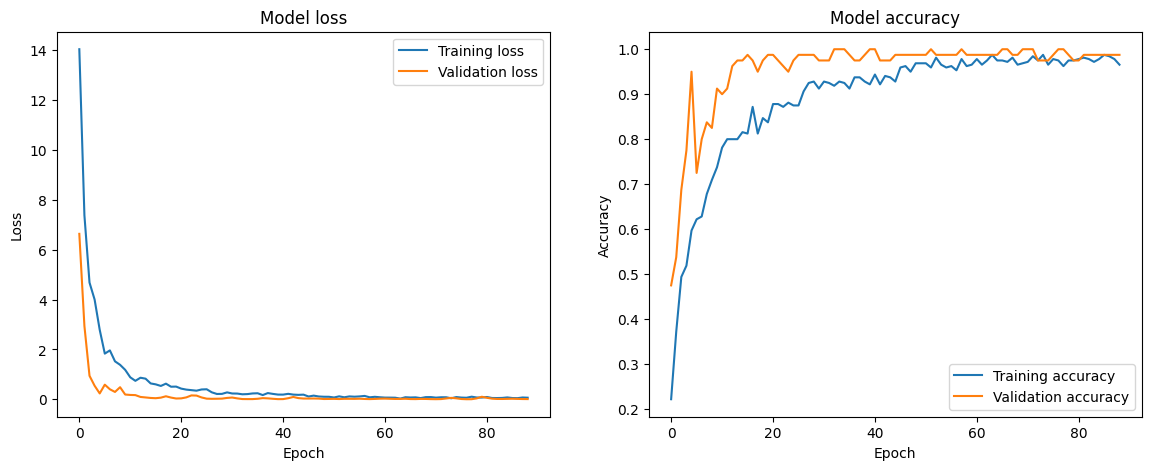

In [24]:
epochs = len(history.history['loss'])

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot training & validation loss values
axs[0].plot(range(epochs), history.history['loss'], label='Training loss')
axs[0].plot(range(epochs), history.history['val_loss'], label='Validation loss')
axs[0].set_title('Model loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Plot training & validation accuracy values
axs[1].plot(range(epochs), history.history['accuracy'], label='Training accuracy')
axs[1].plot(range(epochs), history.history['val_accuracy'], label='Validation accuracy')
axs[1].set_title('Model accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.show()

In [25]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 6ms/step - loss: 8.3415e-04 - accuracy: 1.0000


[0.0008341513457708061, 1.0]

In [26]:
import pickle
pickle.dump(model, open("grad.pkl", "wb"))
loaded_model = pickle.load(open("grad.pkl", "rb"))

In [27]:
# new_data = [[107,34,32,26.774637,66.413269,6.780064,177.774507]]

new_data = [[90, 42,	43,	20.879744,	82.002744,	6.502985,	202.935536]]

In [28]:
predictions = loaded_model.predict(new_data)
predictions[0]


1/1 [==============================] - 0s 119ms/step


array([3.0736824e-09, 1.0854953e-03, 2.9997702e-11, 1.0726079e-06,
       9.9891341e-01], dtype=float32)

In [29]:
np.argmax(predictions[0])

4

In [30]:
crop_category[np.argmax(predictions[0])]

'rice'

In [31]:
# crop_category

In [32]:
# saved_model_path = '/content/saved_model'
# model.save(saved_model_path)

In [33]:
model.save('crop_pred.h5')

In [34]:
new_model = tf.keras.models.load_model('crop_pred.h5')
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 dense (Dense)               (None, 256)               2048      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 5)                 325   